In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
df = pd.DataFrame(
    data = {
        'Feature' : np.arange(1,101),
        'Target'  : np.array([0]*60 + [1]*40)
    }
)
df.head()

,Feature,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


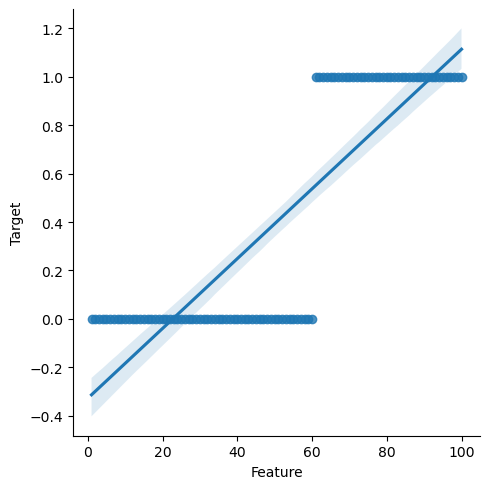

In [3]:
sns.lmplot(data=df, x='Feature', y='Target')

In [4]:
df_jitter = df.copy()
df_jitter['Target'] = df_jitter['Target'] + np.random.normal(0,0.03, size=len(df))
df_jitter['Target'] = df_jitter['Target'].clip(0,1)

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

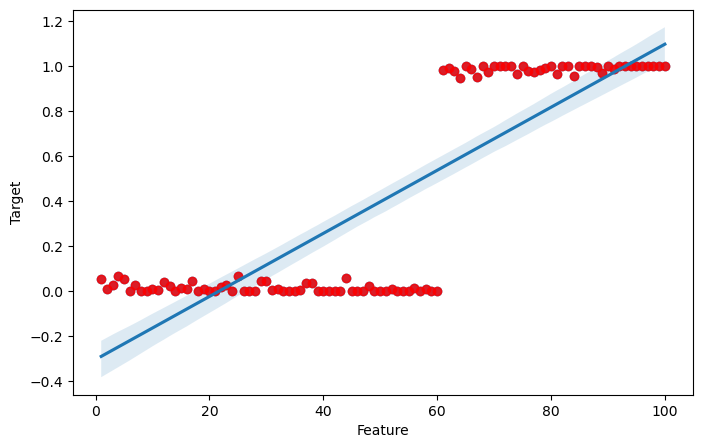

In [5]:
plt.figure(figsize=(8,5))

sns.regplot(
    x='Feature',
    y='Target',
    data=df_jitter,
    label='Linear Regression'
)

sns.regplot(
    x='Feature',
    y='Target',
    data=df_jitter,
    logistic=True,
    color='red',
)

plt.legend()
plt.show()

In [9]:
data = pd.read_csv('./titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data['Pclass'].unique()

array([3, 1, 2])

In [12]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

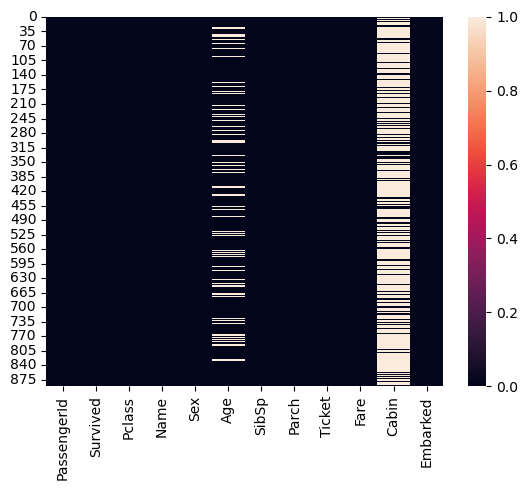

In [14]:
sns.heatmap(data.isnull())

<Axes: >

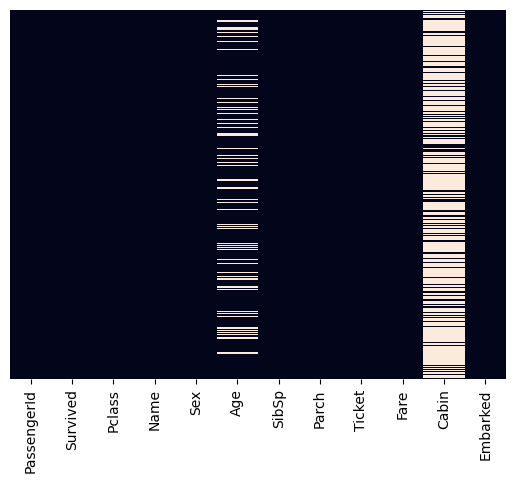

In [15]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [16]:
data.drop(columns=['Cabin'], inplace=True)

<Axes: >

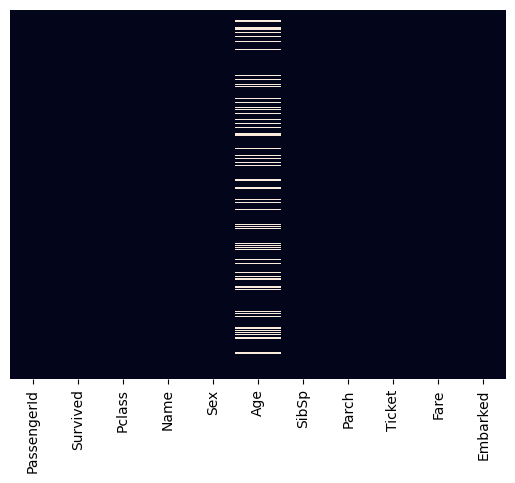

In [17]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='Sex', ylabel='Age'>

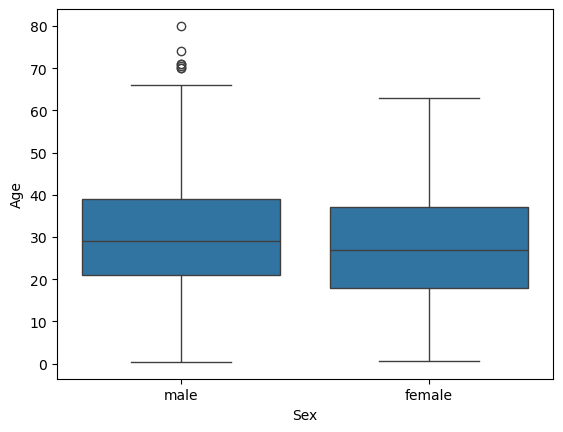

In [18]:
sns.boxplot(data=data, x='Sex', y='Age')